# **CREDIT SCORE CLASSIFICATION MODEL DEVELOPMENT**

![alt the text here](https://img.freepik.com/free-vector/hand-drawn-credit-score-concept_23-2149164575.jpg?w=900&t=st=1725263174~exp=1725263774~hmac=197f3bc36eb5de8aa69feb5e64d9e8d59bbc6d5c7073f6ecda5fba4e53e791f0)



*   **Importing libraries**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



 *   **Uploading Encoded data set**





In [2]:
data=pd.read_csv('/content/NEW_ENCODE_CREDIT_DATA.csv')
data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,0
1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,0
2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,0
3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,5.0,...,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,0
4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,6.0,...,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,0


In [3]:
data.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# **FEATURE ENGINEERING**

**1. Debt-to-Income Ratio**

In [4]:
data['Debt-to-Income Ratio'] = data['Outstanding_Debt']/data['Annual_Income']



*   This feature measures the proportion of income that goes towards debt payments. A higher ratio indicates that a significant portion of income is being used to pay off debts, which might negatively impact credit score.



**2. Monthly Debt Repayment Capacity**

In [5]:
data['Monthly Debt Repayment Capacity'] = data['Monthly_Inhand_Salary']-data['Total_EMI_per_month']



*    This feature indicates how much of an individual's monthly income remains after debt obligations are met. Higher values suggest better debt management, which can positively affect the credit score.



**3. Loan-to-Income Ratio**

In [6]:
data['Loan-to-Income Ratio'] = (data['Num_of_Loan'] /data['Annual_Income'])



*   This feature reflects the relationship between the number of loans and income. A higher ratio may indicate over-leveraging, which can negatively impact creditworthiness.



**4. Delayed Payment Impact**

In [7]:
data['Delayed Payment Impact'] = (data['Num_of_Delayed_Payment'] /data['Num_Credit_Inquiries']) *data['Delay_from_due_date']



*   This feature combines the number of delayed payments with the frequency of credit inquiries and the extent of delays. It helps assess the borrower’s history of making timely payments, which is crucial for credit score assessment.



**5. Credit Mix Effectiveness**

In [8]:
data['Credit Mix Effectiveness'] = (data['Num_of_Loan'] + data['Num_Credit_Card']) / data['Credit_Mix']



*   This feature evaluates the diversity of credit (loans and credit cards) against the credit mix. A balanced credit mix is often seen as a sign of responsible credit management, potentially improving credit scores.



**6. Income Stability Index**

In [9]:
data['Income Stability Index'] = data['Annual_Income'] /data['Age']



*   This feature calculates how well a person’s income grows relative to their age. A higher index might indicate stable and growing income over time, which could contribute to a higher credit score.



**7. Payment Regularity**

In [10]:
data['Payment Regularity'] = data['Payment_of_Min_Amount'] * (1 / data['Num_of_Delayed_Payment'])



*   This feature captures how regularly a person makes minimum payments and factors in delayed payments. Regular payments and fewer delays generally have a positive impact on the credit score.




In [11]:
data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Payment_Behaviour,Monthly_Balance,Credit_Score,Debt-to-Income Ratio,Monthly Debt Repayment Capacity,Loan-to-Income Ratio,Delayed Payment Impact,Credit Mix Effectiveness,Income Stability Index,Payment Regularity
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,2,312.494089,0,0.042376,1775.268384,0.000209,5.25,8.0,831.048696,0.142857
1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,3,284.629162,0,0.042376,1775.268384,0.000209,3.00,8.0,831.048696,0.250000
2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,4,331.209863,0,0.042376,1775.268384,0.000209,5.25,8.0,831.048696,0.142857
3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,5.0,...,5,223.451310,0,0.042376,1775.268384,0.000209,5.00,8.0,831.048696,0.250000
4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,6.0,...,1,341.489231,0,0.042376,1775.268384,0.000209,6.00,8.0,831.048696,0.250000


# **CHI-SQUARE TEST & ANOVA**

In [12]:
from scipy.stats import chi2_contingency, f_oneway

In [13]:
target = 'Credit_Score'

In [14]:
new_features =['Debt-to-Income Ratio','Monthly Debt Repayment Capacity',
               'Loan-to-Income Ratio','Delayed Payment Impact'
               ,'Credit Mix Effectiveness','Income Stability Index','Payment Regularity']

In [15]:
def chi_square_test(feature, target, data):
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return chi2, p

In [16]:
chi_square_results = {feature: chi_square_test(feature, target, data) for feature in new_features}

In [17]:
print("Chi-Square Test Results:")
for feature, result in chi_square_results.items():
    print(f"{feature}: Chi2 = {result[0]}, p-value = {result[1]}")

Chi-Square Test Results:
Debt-to-Income Ratio: Chi2 = 133795.84086124436, p-value = 0.0
Monthly Debt Repayment Capacity: Chi2 = 135220.8713509976, p-value = 0.0
Loan-to-Income Ratio: Chi2 = 117402.36454679881, p-value = 0.0
Delayed Payment Impact: Chi2 = 30572.114059412193, p-value = 0.0
Credit Mix Effectiveness: Chi2 = 30495.737786530855, p-value = 0.0
Income Stability Index: Chi2 = 140212.13049297084, p-value = 0.0
Payment Regularity: Chi2 = 12626.046667528997, p-value = 0.0




*   All the columns have very low p-values (p < 0.05), that is 0 .it indicating a significant relationship
with credit score.



**ANOVA**

In [19]:
def anova_test(feature, target, data):
    groups = [data[data[target] == value][feature].values for value in data[target].unique()]
    f_stat, p_value = f_oneway(*groups)
    return f_stat, p_value

In [20]:
anova_results = {feature: anova_test(feature, target, data) for feature in new_features}


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4139: RuntimeWarning: invalid value encountered in subtract
  alldata = alldata - offset
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4147: RuntimeWarning: invalid value encountered in subtract
  smo_ss = _square_of_sums(sample - offset, axis=axis)


In [21]:
print("\nANOVA Test Results:")
for feature, result in anova_results.items():
    print(f"{feature}: F-statistic = {result[0]}, p-value = {result[1]}")



ANOVA Test Results:
Debt-to-Income Ratio: F-statistic = 5436.678601163059, p-value = 0.0
Monthly Debt Repayment Capacity: F-statistic = 2421.9429579560333, p-value = 0.0
Loan-to-Income Ratio: F-statistic = 4831.772434456053, p-value = 0.0
Delayed Payment Impact: F-statistic = nan, p-value = nan
Credit Mix Effectiveness: F-statistic = nan, p-value = nan
Income Stability Index: F-statistic = 893.3534846940903, p-value = 0.0
Payment Regularity: F-statistic = nan, p-value = nan




*   'Debt-to-Income Ratio','Monthly Debt Repayment Capacity','Loan-to-Income Ratio','Income Stability Index', have very low p-values (p < 0.05), indicating a significant difference in means between credit score .



# **Removing Unwanted Columns**

In [22]:
significant_features = [feature for feature in new_features if chi_square_results[feature][1] < 0.05
                        and anova_results[feature][1] < 0.05]
data = data.drop(columns=[feature for feature in new_features if feature not in significant_features])

In [23]:
data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Debt-to-Income Ratio,Monthly Debt Repayment Capacity,Loan-to-Income Ratio,Income Stability Index
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,1,49.574949,21.46538,2,312.494089,0,0.042376,1775.268384,0.000209,831.048696
1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,1,49.574949,21.46538,3,284.629162,0,0.042376,1775.268384,0.000209,831.048696
2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,1,49.574949,21.46538,4,331.209863,0,0.042376,1775.268384,0.000209,831.048696
3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,5.0,...,1,49.574949,21.46538,5,223.451310,0,0.042376,1775.268384,0.000209,831.048696
4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,6.0,...,1,49.574949,21.46538,1,341.489231,0,0.042376,1775.268384,0.000209,831.048696




*   Remove non-significant columns based on the Chi-Square test results



In [24]:
data.value_counts('Credit_Score')

,count
Credit_Score,
2,53174
1,28998
0,17828


In [ ]:
from google.colab import files

data.to_csv('NEW_FEATURE_DATASET.CSV',index=False)
files.download('NEW_FEATURE_DATASET.CSV')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 **SCALING the data after feature engineering**



*   STANDARDSCALAR



In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
sc_data=sc.fit_transform(data)

In [27]:
datascaled_new=pd.DataFrame(sc_data)
datascaled_new.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.958344,1.171861,-0.831416,-0.754806,-0.913438,-0.741899,-1.319266,0.190946,-1.788587,-1.244692,...,-0.58149,-0.531061,-0.951119,-0.409455,-0.400095,-1.769439,-0.203498,-0.749655,0.336447,-0.599589
1,-0.958344,1.171861,-0.831416,-0.754806,-0.913438,-0.741899,-1.319266,0.190946,-1.788587,-1.244692,...,-0.58149,-0.531061,-0.951119,0.127796,-0.561962,-1.769439,-0.203498,-0.749655,0.336447,-0.599589
2,-0.958344,1.171861,-0.831416,-0.754806,-0.913438,-0.741899,-1.319266,0.190946,-1.788587,-1.244692,...,-0.58149,-0.531061,-0.951119,0.665046,-0.291375,-1.769439,-0.203498,-0.749655,0.336447,-0.599589
3,-0.958344,1.171861,-0.831416,-0.754806,-0.913438,-0.741899,-1.319266,0.190946,-1.788587,-1.105761,...,-0.58149,-0.531061,-0.951119,1.202296,-0.917344,-1.769439,-0.203498,-0.749655,0.336447,-0.599589
4,-0.958344,1.171861,-0.831416,-0.754806,-0.913438,-0.741899,-1.319266,0.190946,-1.788587,-1.036295,...,-0.58149,-0.531061,-0.951119,-0.946705,-0.231662,-1.769439,-0.203498,-0.749655,0.336447,-0.599589


In [28]:
data.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Debt-to-Income Ratio',
       'Monthly Debt Repayment Capacity', 'Loan-to-Income Ratio',
       'Income Stability Index'],
      dtype='object')

# **MODEL CREATION**



*   first split of data( independend and dependent)



In [31]:
y=data['Credit_Score']
x=data.drop(['Credit_Score'],axis=1)



*   second split of data( train and test)



In [30]:
from sklearn.model_selection import train_test_split


In [32]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


# **(1)LOGISTIC REGRESSION**

In [31]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [32]:
log_model.fit(X_train,y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_prediction=log_model.predict(X_test)



*   classification_report, precision_score, recall_score, f1_score



In [36]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,confusion_matrix,accuracy_score


In [35]:
# For Precision, Recall, and F1 with 'weighted' average
precision = precision_score(y_test, y_prediction, average='weighted')
recall = recall_score(y_test, y_prediction, average='weighted')
f1 = f1_score(y_test, y_prediction, average='weighted')

# Print the classification report (which also handles multiclass)
print(classification_report(y_test, y_prediction))


              precision    recall  f1-score   support

           0       0.40      0.04      0.07      3527
           1       0.54      0.35      0.42      5874
           2       0.55      0.83      0.66     10599

    accuracy                           0.55     20000
   macro avg       0.50      0.40      0.38     20000
weighted avg       0.52      0.55      0.49     20000



In [36]:
confusion_matrix(y_test,y_prediction)


array([[ 134,   68, 3325],
       [  24, 2027, 3823],
       [ 174, 1663, 8762]])

# **(2)KNN CLASSIFIER**

In [37]:
from sklearn.neighbors import KNeighborsClassifier
metrics_k=[]
neighbors=np.arange(1,15)

In [38]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(X_train,y_train)
    y_prediction=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_prediction)
    metrics_k.append(acc)

metrics_k

[0.77295,
 0.79435,
 0.7933,
 0.79745,
 0.79875,
 0.7991,
 0.7886,
 0.7746,
 0.75395,
 0.7285,
 0.7092,
 0.68765,
 0.6783,
 0.6672]

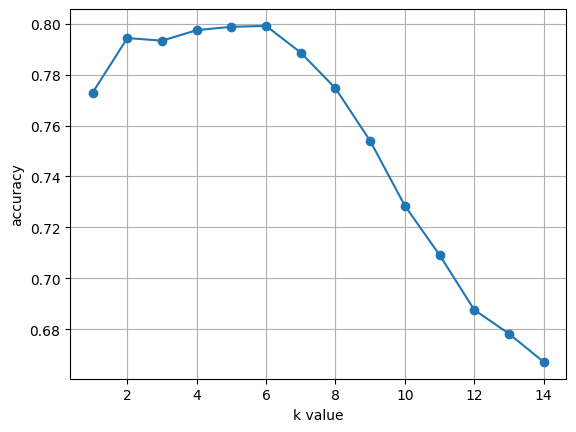

In [39]:
plt.plot(neighbors,metrics_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [40]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='euclidean')
classifier.fit(X_train,y_train)
y_prediction=classifier.predict(X_test)
acc=accuracy_score(y_test,y_prediction)


In [41]:
# For Precision, Recall, and F1 with 'weighted' average
precision = precision_score(y_test, y_prediction, average='weighted')
recall = recall_score(y_test, y_prediction, average='weighted')
f1 = f1_score(y_test, y_prediction, average='weighted')

# Print the classification report (which also handles multiclass)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      3527
           1       0.76      0.88      0.82      5874
           2       0.86      0.75      0.80     10599

    accuracy                           0.80     20000
   macro avg       0.78      0.81      0.79     20000
weighted avg       0.81      0.80      0.80     20000



# **(3)DECISION TREE**

In [42]:
from sklearn.tree import DecisionTreeClassifier
ds_clf=DecisionTreeClassifier(criterion='entropy')
ds_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
y_prediction=ds_clf.predict(X_test)

In [44]:
print(confusion_matrix(y_test,y_prediction))

[[2487   50  990]
 [  66 4378 1430]
 [1009 1412 8178]]


In [45]:
# For Precision, Recall, and F1 with 'weighted' average
precision = precision_score(y_test, y_prediction, average='weighted')
recall = recall_score(y_test, y_prediction, average='weighted')
f1 = f1_score(y_test, y_prediction, average='weighted')

# Print the classification report (which also handles multiclass)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      3527
           1       0.75      0.75      0.75      5874
           2       0.77      0.77      0.77     10599

    accuracy                           0.75     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.75      0.75      0.75     20000



**(4)RANDOM FOREST CLASSIFIER**

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_prediction_rf=rf_clf.predict(X_test)


In [37]:
print(confusion_matrix(y_test,y_prediction_rf))


[[2741   13  773]
 [   7 5027  840]
 [ 731 1234 8634]]


In [38]:
# For Precision, Recall, and F1 with 'weighted' average
precision = precision_score(y_test, y_prediction_rf, average='weighted')
recall = recall_score(y_test, y_prediction_rf, average='weighted')
f1 = f1_score(y_test, y_prediction_rf, average='weighted')

# Print the classification report (which also handles multiclass)
print(classification_report(y_test, y_prediction_rf))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      3527
           1       0.80      0.86      0.83      5874
           2       0.84      0.81      0.83     10599

    accuracy                           0.82     20000
   macro avg       0.81      0.82      0.81     20000
weighted avg       0.82      0.82      0.82     20000





*   Random Forest classifier gives more accuracy . so we select Random Forest Model.

